### Dimensionaity Reduction

* reducing the number of features in our dataset.

**Why is dimensionality reduction used?**
* To save the space
* less features makes the computations easy
* efficiency of the model will be increased.
* to avoid the multicolinearity features.
* For feature selection and for variable seletction we use dimensionality reduction.

**Scatter plot for 100 values:**

<img src = "https://camo.githubusercontent.com/f5b39c6ec93bac32eb8e3c74e39721a1cb250100/68747470733a2f2f63646e2e616e616c79746963737669646879612e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f30382f53637265656e73686f742d66726f6d2d323031382d30382d30392d31392d31342d33312e706e67">

**Plot for the features kgs and pounds:**

<img src = "https://camo.githubusercontent.com/d6b4b3af6fab5441136125e6b3c631c818999b82/68747470733a2f2f63646e2e616e616c79746963737669646879612e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f30382f53637265656e73686f742d66726f6d2d323031382d30372d32362d31332d30362d33352e706e67">

**combining both features into one:**

<img src = "https://camo.githubusercontent.com/10a2dc1a9063223853790e48ff7b7b13ae2950a6/68747470733a2f2f63646e2e616e616c79746963737669646879612e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031382f30382f53637265656e73686f742d66726f6d2d323031382d30372d32362d31332d35312d35322e706e67">

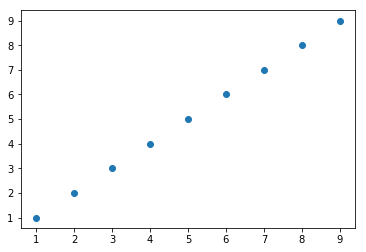

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = [i for i in range(1,10)]
y = [i for i in range(1,10)]
plt.scatter(x,y)
plt.show()

In [46]:
train = pd.read_csv("https://raw.githubusercontent.com/AP-Skill-Development-Corporation/Tirumala-ML/main/Day-12/train_v9rqX0R.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**missing value ratio**:


In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [16]:
train.isnull().sum()/len(train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [18]:
## saving the missing values in a variable

a = train.isnull().sum()/len(train)*100

## saving the column names in a variable.

variables = train.columns
v = []
for i in range(len(variables)):
    if a[i] <= 20:
        v.append(variables[i])

In [22]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
v

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

**Low variance filter**:


In [27]:
train["Item_Weight"].fillna(train["Item_Weight"].median(),inplace = True)
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0],inplace = True)


In [28]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [30]:
numeric =  train[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
var = numeric.var()
numeric = numeric.columns
variable = []
for i in range(len(var)):
    if var[i] >=10:
        variable.append(numeric[i])

In [32]:
variable

['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

**High correlation filter**:
* similarity of the features

In [37]:
data = train.drop("Item_Outlet_Sales",1)

In [34]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


**Backward Feature Elimination**


0 1 2 3  

* 0 1 2
* 0 1 3
* 0 2 3
* 1 2 3


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg,10)
rfe = rfe.fit_transform(data,train.Item_Outlet_Sales)

In [55]:
from sklearn.ensemble import RandomForestRegressor
data = data.drop(["Item_Identifier","Outlet_Identifier"],axis = 1)
model = RandomForestRegressor(random_state = 1,max_depth = 10)
data = pd.get_dummies(data)
model.fit(data,train.Item_Outlet_Sales)

C:\Users\Niharikaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [56]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(model)
Fit = feature.fit_transform(data,train.Item_Outlet_Sales)

In [39]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
train["Item_Outlet_Sales"].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
1230.3984    14
1416.8224    13
1438.1280    12
759.0120     12
575.2512     12
1211.7560    12
539.2980     12
852.2240     11
1537.9980    11
1701.7848    11
639.1680     11
679.1160     11
2109.2544    11
2277.0360    11
1406.1696    11
1304.9680    11
2696.4900    10
1470.0864    10
1006.6896    10
2117.2440    10
2956.1520    10
1821.6288    10
2348.9424    10
918.8040     10
1677.8160    10
             ..
6911.0040     1
3837.0054     1
4821.7236     1
2526.0452     1
3211.8192     1
670.4606      1
2706.4770     1
316.2550      1
4483.4972     1
2119.9072     1
2925.5252     1
3542.7218     1
6275.1650     1
1803.6522     1
2764.4016     1
3073.9986     1
1311.6260     1
6524.8400     1
1998.7316     1
1599.9174     1
5329.0632     1
4610.6650     1
3938.8728     1
233.0300      1
7478.2656     1
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales,

In [51]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1
